     categoria  valor_venda
0  Eletrônicos       6100.0
1       Livros        900.0
2       Roupas       1500.0
data_venda
2023-01    1550.0
2023-02    1200.0
2023-03    1000.0
2023-04     400.0
2023-05     150.0
2023-06    1000.0
2023-07     600.0
2023-08     700.0
2023-09     300.0
2023-10     450.0
2023-11     900.0
2023-12     250.0
Freq: M, Name: valor_venda, dtype: float64


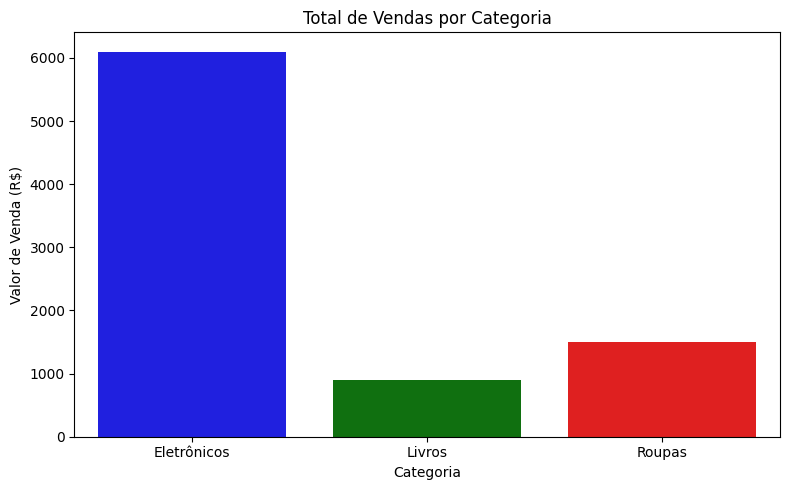

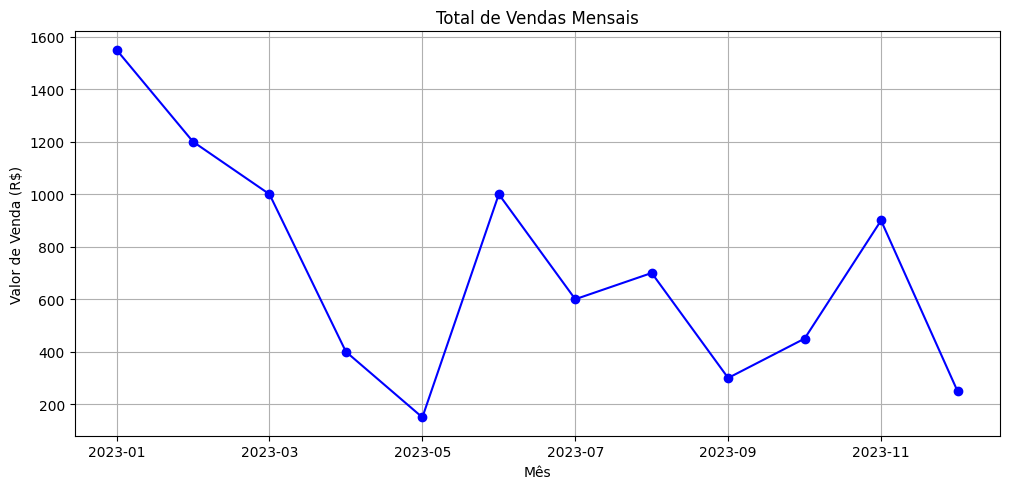

In [52]:
import sqlite3 as sqlite3
conexao = sqlite3.connect('dados_vendas.db')
cursor = conexao.cursor()
#Criar uma tabela (se não existir)
cursor.execute("DROP TABLE IF EXISTS vendas1;")
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
  id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
  data_venda DATE,
  produto TEXT,
  categoria TEXT,
  valor_venda REAL
)
''')
#Inserir dados
cursor.execute('''
INSERT INTO vendas1(data_venda, produto, categoria, valor_venda) VALUES
('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
('2023-01-05', 'Produto B', 'Roupas', 50.00),
('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
('2023-03-15', 'Produto D', 'Livros', 200.00),
('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
('2023-04-02', 'Produto F', 'Roupas', 400.00),
('2023-05-05', 'Produto G', 'Livros', 150.00),
('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
('2023-07-20', 'Produto I', 'Roupas', 600.00),
('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
('2023-09-30', 'Produto K', 'Livros', 300.00),
('2023-10-05', 'Produto L', 'Roupas', 450.00),
('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
('2023-12-20', 'Produto N', 'Livros', 250.00);
''')
#Confirmar as mudanças
conexao.commit()

#Ler os dados com Pandas
import pandas as pd

#carregar os dados da Tabela em um DataFrame
df_vendas = pd.read_sql_query('SELECT * FROM vendas1', conexao)

#exibir as primeiras linhas do DataFrame
df_vendas.head()

#Análise dos dados
#Total de vendas por categoria
vendas_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().reset_index()
print(vendas_por_categoria)
#Total de vendas mensal
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])
vendas_mensais = df_vendas.groupby(df_vendas['data_venda'].dt.to_period('M'))['valor_venda'].sum()
print(vendas_mensais)

#Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#gráfico de vendas por categoria
plt.figure(figsize=(8,5))
colors = ['blue', 'green', 'red']
sns.barplot(x='categoria', y='valor_venda', data=vendas_por_categoria, hue='categoria', palette=colors, dodge=False, legend=False)
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor de Venda (R$)')
plt.tight_layout()
plt.show()

#gráfico de vendas por mês
vendas_mensais.index = vendas_mensais.index.astype(str)
vendas_mensais.plot(kind='line', marker='o', linestyle='-', figsize=(10,5), color='b')
plt.title('Total de Vendas Mensais')
plt.grid(True)
plt.tight_layout()
plt.xlabel('Mês')
plt.ylabel('Valor de Venda (R$)')
plt.show()

